In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/..../cancer_classification.csv')

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Set Characteristics:
:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


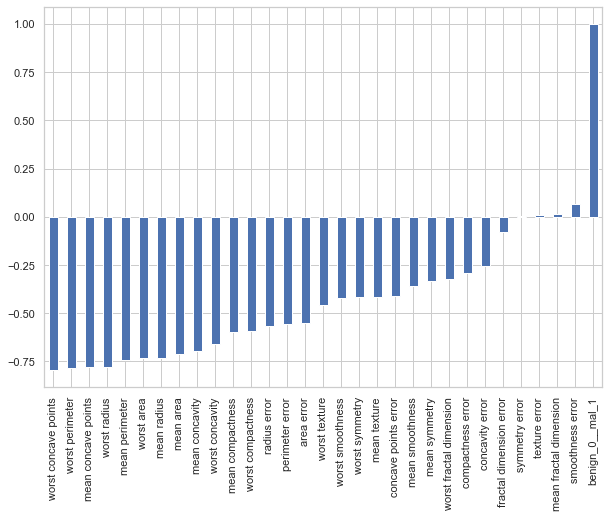

In [12]:
plt.figure(figsize=(10,7))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
plt.show()

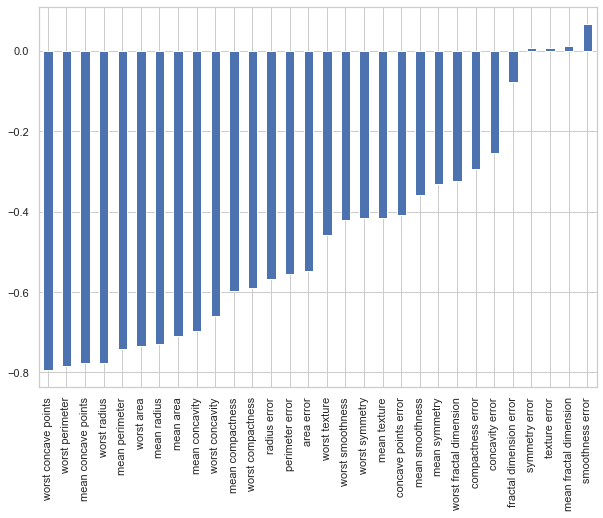

In [13]:
#drop the target variable
plt.figure(figsize=(10,7))
df.corr()['benign_0__mal_1'][:-1] .sort_values().plot(kind='bar')
plt.show()

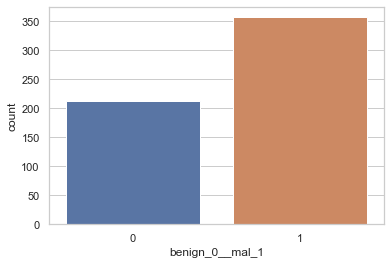

In [22]:
sns.countplot(x='benign_0__mal_1',data=df)

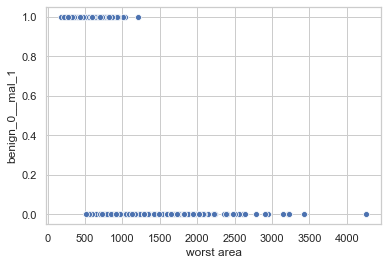

In [25]:
sns.scatterplot(x='worst area', y='benign_0__mal_1', data=df)

plt.show()

In [21]:
X=df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split



In [16]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.transform(X_test)

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense, Activation,Dropout

In [29]:
X_train.shape

(398, 30)

In [33]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#because of binary classification, the activation is 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
model.fit(x=X_train, y=y_train, epochs=600,
         validation_data=(X_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 2ms/sample - loss: 0.6972 - val_loss: 0.6832
Epoch 2/600
398/398 [==============================] - 0s 96us/sample - loss: 0.6779 - val_loss: 0.6607
Epoch 3/600
398/398 [==============================] - 0s 99us/sample - loss: 0.6533 - val_loss: 0.6314
Epoch 4/600
398/398 [==============================] - 0s 85us/sample - loss: 0.6253 - val_loss: 0.5989
Epoch 5/600
398/398 [==============================] - 0s 71us/sample - loss: 0.5943 - val_loss: 0.5611
Epoch 6/600
398/398 [==============================] - 0s 70us/sample - loss: 0.5582 - val_loss: 0.5209
Epoch 7/600
398/398 [==============================] - 0s 67us/sample - loss: 0.5197 - val_loss: 0.4775
Epoch 8/600
398/398 [==============================] - 0s 78us/sample - loss: 0.4781 - val_loss: 0.4333
Epoch 9/600
398/398 [==============================] - 0s 71us/sample - loss: 0.4361 - val_loss: 0.3900
Epoch 10/600
398/39

398/398 [==============================] - 0s 108us/sample - loss: 0.0452 - val_loss: 0.0549
Epoch 156/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0468 - val_loss: 0.0528
Epoch 157/600
398/398 [==============================] - 0s 115us/sample - loss: 0.0491 - val_loss: 0.0590
Epoch 158/600
398/398 [==============================] - 0s 147us/sample - loss: 0.0484 - val_loss: 0.0519
Epoch 159/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0452 - val_loss: 0.0590
Epoch 160/600
398/398 [==============================] - 0s 119us/sample - loss: 0.0437 - val_loss: 0.0517
Epoch 161/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0439 - val_loss: 0.0558
Epoch 162/600
398/398 [==============================] - 0s 112us/sample - loss: 0.0449 - val_loss: 0.0561
Epoch 163/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0446 - val_loss: 0.0528
Epoch 164/600
398/398 [============================

Epoch 232/600
398/398 [==============================] - 0s 83us/sample - loss: 0.0329 - val_loss: 0.0614
Epoch 233/600
398/398 [==============================] - 0s 78us/sample - loss: 0.0329 - val_loss: 0.0650
Epoch 234/600
398/398 [==============================] - 0s 71us/sample - loss: 0.0339 - val_loss: 0.0633
Epoch 235/600
398/398 [==============================] - 0s 77us/sample - loss: 0.0336 - val_loss: 0.0659
Epoch 236/600
398/398 [==============================] - 0s 117us/sample - loss: 0.0329 - val_loss: 0.0669
Epoch 237/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0324 - val_loss: 0.0673
Epoch 238/600
398/398 [==============================] - 0s 84us/sample - loss: 0.0352 - val_loss: 0.0624
Epoch 239/600
398/398 [==============================] - 0s 91us/sample - loss: 0.0328 - val_loss: 0.0638
Epoch 240/600
398/398 [==============================] - 0s 96us/sample - loss: 0.0334 - val_loss: 0.0667
Epoch 241/600
398/398 [=====================

Epoch 309/600
398/398 [==============================] - 0s 91us/sample - loss: 0.0261 - val_loss: 0.0859
Epoch 310/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0241 - val_loss: 0.0878
Epoch 311/600
398/398 [==============================] - 0s 92us/sample - loss: 0.0243 - val_loss: 0.0840
Epoch 312/600
398/398 [==============================] - 0s 96us/sample - loss: 0.0229 - val_loss: 0.0910
Epoch 313/600
398/398 [==============================] - 0s 97us/sample - loss: 0.0225 - val_loss: 0.0888
Epoch 314/600
398/398 [==============================] - 0s 96us/sample - loss: 0.0223 - val_loss: 0.0911
Epoch 315/600
398/398 [==============================] - 0s 97us/sample - loss: 0.0242 - val_loss: 0.0862
Epoch 316/600
398/398 [==============================] - 0s 94us/sample - loss: 0.0215 - val_loss: 0.0858
Epoch 317/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0214 - val_loss: 0.0868
Epoch 318/600
398/398 [=====================

398/398 [==============================] - 0s 121us/sample - loss: 0.0150 - val_loss: 0.1055
Epoch 387/600
398/398 [==============================] - 0s 124us/sample - loss: 0.0178 - val_loss: 0.1263
Epoch 388/600
398/398 [==============================] - 0s 79us/sample - loss: 0.0158 - val_loss: 0.1139
Epoch 389/600
398/398 [==============================] - 0s 131us/sample - loss: 0.0152 - val_loss: 0.1237
Epoch 390/600
398/398 [==============================] - 0s 87us/sample - loss: 0.0142 - val_loss: 0.1187
Epoch 391/600
398/398 [==============================] - 0s 135us/sample - loss: 0.0141 - val_loss: 0.1191
Epoch 392/600
398/398 [==============================] - 0s 84us/sample - loss: 0.0135 - val_loss: 0.1147
Epoch 393/600
398/398 [==============================] - 0s 76us/sample - loss: 0.0141 - val_loss: 0.1218
Epoch 394/600
398/398 [==============================] - 0s 72us/sample - loss: 0.0144 - val_loss: 0.1139
Epoch 395/600
398/398 [==============================] -

398/398 [==============================] - 0s 70us/sample - loss: 0.0085 - val_loss: 0.1937
Epoch 541/600
398/398 [==============================] - 0s 63us/sample - loss: 0.0086 - val_loss: 0.1692
Epoch 542/600
398/398 [==============================] - 0s 78us/sample - loss: 0.0065 - val_loss: 0.1782
Epoch 543/600
398/398 [==============================] - 0s 65us/sample - loss: 0.0071 - val_loss: 0.1719
Epoch 544/600
398/398 [==============================] - 0s 72us/sample - loss: 0.0078 - val_loss: 0.1645
Epoch 545/600
398/398 [==============================] - 0s 73us/sample - loss: 0.0079 - val_loss: 0.1849
Epoch 546/600
398/398 [==============================] - 0s 66us/sample - loss: 0.0068 - val_loss: 0.1701
Epoch 547/600
398/398 [==============================] - 0s 80us/sample - loss: 0.0060 - val_loss: 0.1720
Epoch 548/600
398/398 [==============================] - 0s 73us/sample - loss: 0.0059 - val_loss: 0.1710
Epoch 549/600
398/398 [==============================] - 0s 

In [37]:
losses=pd.DataFrame(model.history.history)

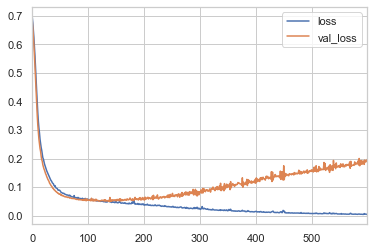

In [43]:
#example of overfitting next early stop will be applied
losses.plot()
plt.show()

In [45]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#because of binary classification, the activation is 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [48]:
early_stop =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [49]:
model.fit(x=X_train, y=y_train, epochs=600,
         validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 1ms/sample - loss: 0.6417 - val_loss: 0.6128
Epoch 2/600
398/398 [==============================] - 0s 75us/sample - loss: 0.5968 - val_loss: 0.5623
Epoch 3/600
398/398 [==============================] - 0s 75us/sample - loss: 0.5457 - val_loss: 0.5050
Epoch 4/600
398/398 [==============================] - 0s 70us/sample - loss: 0.4969 - val_loss: 0.4553
Epoch 5/600
398/398 [==============================] - 0s 90us/sample - loss: 0.4509 - val_loss: 0.4103
Epoch 6/600
398/398 [==============================] - 0s 82us/sample - loss: 0.4066 - val_loss: 0.3680
Epoch 7/600
398/398 [==============================] - 0s 92us/sample - loss: 0.3674 - val_loss: 0.3291
Epoch 8/600
398/398 [==============================] - 0s 83us/sample - loss: 0.3309 - val_loss: 0.2963
Epoch 9/600
398/398 [==============================] - 0s 122us/sample - loss: 0.3034 - val_loss: 0.2675
Epoch 10/600
398/3

In [50]:
losses=pd.DataFrame(model.history.history)

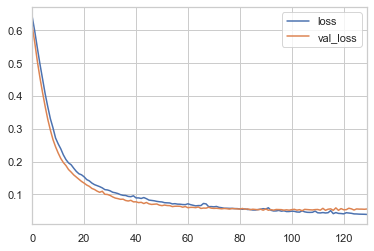

In [51]:
#overfitting is fixed
losses.plot()
plt.show()

In [53]:
from tensorflow.keras.layers import Dropout

In [54]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))



#because of binary classification, the activation is 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [55]:
model.fit(x=X_train, y=y_train, epochs=600,
         validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 1ms/sample - loss: 0.6680 - val_loss: 0.6375
Epoch 2/600
398/398 [==============================] - 0s 79us/sample - loss: 0.6695 - val_loss: 0.6134
Epoch 3/600
398/398 [==============================] - 0s 84us/sample - loss: 0.6294 - val_loss: 0.5853
Epoch 4/600
398/398 [==============================] - 0s 79us/sample - loss: 0.6160 - val_loss: 0.5626
Epoch 5/600
398/398 [==============================] - 0s 81us/sample - loss: 0.6131 - val_loss: 0.5410
Epoch 6/600
398/398 [==============================] - 0s 80us/sample - loss: 0.5754 - val_loss: 0.5148
Epoch 7/600
398/398 [==============================] - 0s 82us/sample - loss: 0.5618 - val_loss: 0.4853
Epoch 8/600
398/398 [==============================] - 0s 78us/sample - loss: 0.5343 - val_loss: 0.4582
Epoch 9/600
398/398 [==============================] - 0s 77us/sample - loss: 0.5250 - val_loss: 0.4374
Epoch 10/600
398/39

398/398 [==============================] - 0s 79us/sample - loss: 0.0944 - val_loss: 0.0485
Epoch 156/600
398/398 [==============================] - 0s 115us/sample - loss: 0.0706 - val_loss: 0.0467
Epoch 157/600
398/398 [==============================] - 0s 76us/sample - loss: 0.0641 - val_loss: 0.0421
Epoch 158/600
398/398 [==============================] - 0s 72us/sample - loss: 0.0787 - val_loss: 0.0413
Epoch 159/600
398/398 [==============================] - ETA: 0s - loss: 0.063 - 0s 74us/sample - loss: 0.0904 - val_loss: 0.0409
Epoch 160/600
398/398 [==============================] - ETA: 0s - loss: 0.031 - 0s 76us/sample - loss: 0.0714 - val_loss: 0.0483
Epoch 161/600
398/398 [==============================] - 0s 87us/sample - loss: 0.0988 - val_loss: 0.0494
Epoch 162/600
398/398 [==============================] - 0s 90us/sample - loss: 0.0888 - val_loss: 0.0445
Epoch 163/600
398/398 [==============================] - 0s 130us/sample - loss: 0.0731 - val_loss: 0.0449
Epoch 164/

In [56]:
losses=pd.DataFrame(model.history.history)

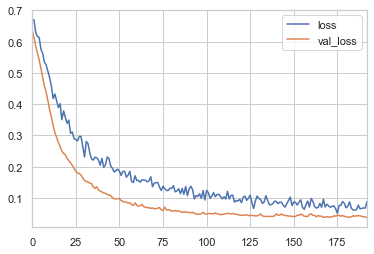

In [57]:
#overfitting is fixed, even better
losses.plot()
plt.show()

In [59]:
pred=model.predict_classes(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [63]:
print(confusion_matrix(y_test,pred))

[[ 62   1]
 [  1 107]]
